<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/Logo_INSAvilletoulouse-RVB.png" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>
</center>

# [Scénarios d'Exploration Statistique](https://github.com/wikistat/Exploration)

# Initiation to PCA with <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a>
#### Summary
This is an adaptation of the notebook 
https://github.com/wikistat/Exploration/blob/master/TutosRudim/Cal1-R-SVDtoACP.ipynb
[Analyse en Composantes Principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf). We do a PCA of a dataset composed of monthly temperature data of 36 French cities, with the R package [`FactoMineR`](http://factominer.free.fr/).

#### Note
As you can see, all the R code is given. The focus is on the statistical analysis.
Answer to the questions marked: **Q**.

## PCA of temperature curves
The dataset is contained in the file `tempR.dat` available on the same repository as the notebook. 
It contains the montly temperature, averaged from 1931 to 1960, of 36 French cities. The first variable is the city name (4 characters), and the 12 next represent a month (source: Mémorial de la Météorologie nationale). 

### Elementary exploration

In [1]:
# data loading
temp <- read.table("tempR.dat")
# verifications and elementary statistics
summary(temp)
head(temp)

      janv            fevr            mars             avri       
 Min.   :0.400   Min.   :1.500   Min.   : 5.500   Min.   : 8.900  
 1st Qu.:2.075   1st Qu.:3.125   1st Qu.: 6.875   1st Qu.: 9.675  
 Median :3.450   Median :4.250   Median : 7.700   Median :10.400  
 Mean   :3.836   Mean   :4.678   Mean   : 8.014   Mean   :10.772  
 3rd Qu.:5.525   3rd Qu.:6.000   3rd Qu.: 9.375   3rd Qu.:11.700  
 Max.   :8.600   Max.   :9.100   Max.   :11.300   Max.   :13.900  
      mai             juin            juil            aout      
 Min.   :11.60   Min.   :14.40   Min.   :15.60   Min.   :16.00  
 1st Qu.:13.30   1st Qu.:16.57   1st Qu.:18.40   1st Qu.:18.12  
 Median :13.90   Median :17.20   Median :19.10   Median :18.75  
 Mean   :14.25   Mean   :17.61   Mean   :19.61   Mean   :19.32  
 3rd Qu.:14.90   3rd Qu.:18.55   3rd Qu.:20.75   3rd Qu.:20.30  
 Max.   :17.10   Max.   :21.10   Max.   :23.80   Max.   :23.30  
      sept            octo            nove             dece      
 Min.   :1

,janv,fevr,mars,avri,mai,juin,juil,aout,sept,octo,nove,dece
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2
bord,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2


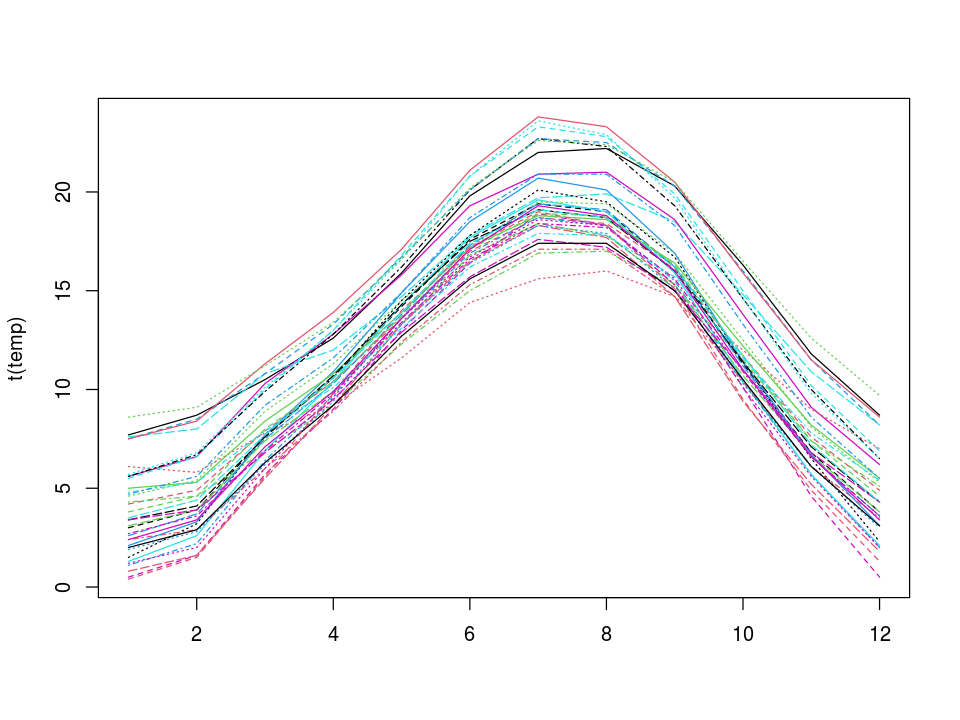

In [2]:
# Plot
options(repr.plot.width = 8, repr.plot.height = 6)
matplot(t(temp), type = "l")

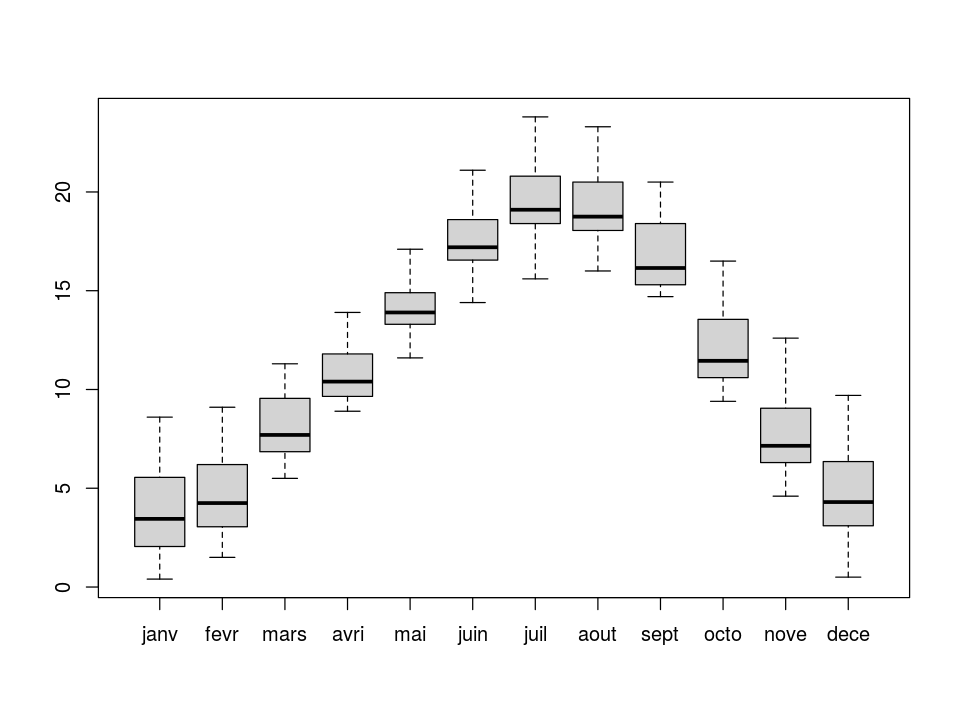

In [3]:
# Boxplots
boxplot(temp)

**Q** What can you say about the distributions (position, dispersion, symmetry)?

**Q** Consequence for PCA: should we scale the data before doing a PCA? 

In [4]:
# Correlations
cor(temp)

,janv,fevr,mars,avri,mai,juin,juil,aout,sept,octo,nove,dece
janv,1.0000000,0.9885360,0.9199117,0.7825097,0.5995795,0.5663280,0.5398900,0.6296871,0.7907821,0.9276428,0.9753371,0.9948352
fevr,0.9885360,1.0000000,0.9618949,0.8561302,0.6982284,0.6687648,0.6460014,0.7275281,0.8662304,0.9676484,0.9905985,0.9850215
mars,0.9199117,0.9618949,1.0000000,0.9462747,0.8280143,0.8042627,0.7810710,0.8446493,0.9370059,0.9716271,0.9574533,0.9154278
avri,0.7825097,0.8561302,0.9462747,1.0000000,0.9613805,0.9438164,0.9253098,0.9566592,0.9780987,0.9292199,0.8715025,0.7871887
mai,0.5995795,0.6982284,0.8280143,0.9613805,1.0000000,0.9905124,0.9830884,0.9841428,0.9456148,0.8267931,0.7332866,0.6120187
juin,0.5663280,0.6687648,0.8042627,0.9438164,0.9905124,1.0000000,0.9917333,0.9863038,0.9350057,0.8037035,0.7043545,0.5790681
juil,0.5398900,0.6460014,0.7810710,0.9253098,0.9830884,0.9917333,1.0000000,0.9901252,0.9308617,0.7934865,0.6847357,0.5520168
aout,0.6296871,0.7275281,0.8446493,0.9566592,0.9841428,0.9863038,0.9901252,1.0000000,0.9690372,0.8596967,0.7619311,0.6406010
sept,0.7907821,0.8662304,0.9370059,0.9780987,0.9456148,0.9350057,0.9308617,0.9690372,1.0000000,0.9566552,0.8911815,0.7968598
octo,0.9276428,0.9676484,0.9716271,0.9292199,0.8267931,0.8037035,0.7934865,0.8596967,0.9566552,1.0000000,0.9805347,0.9301548


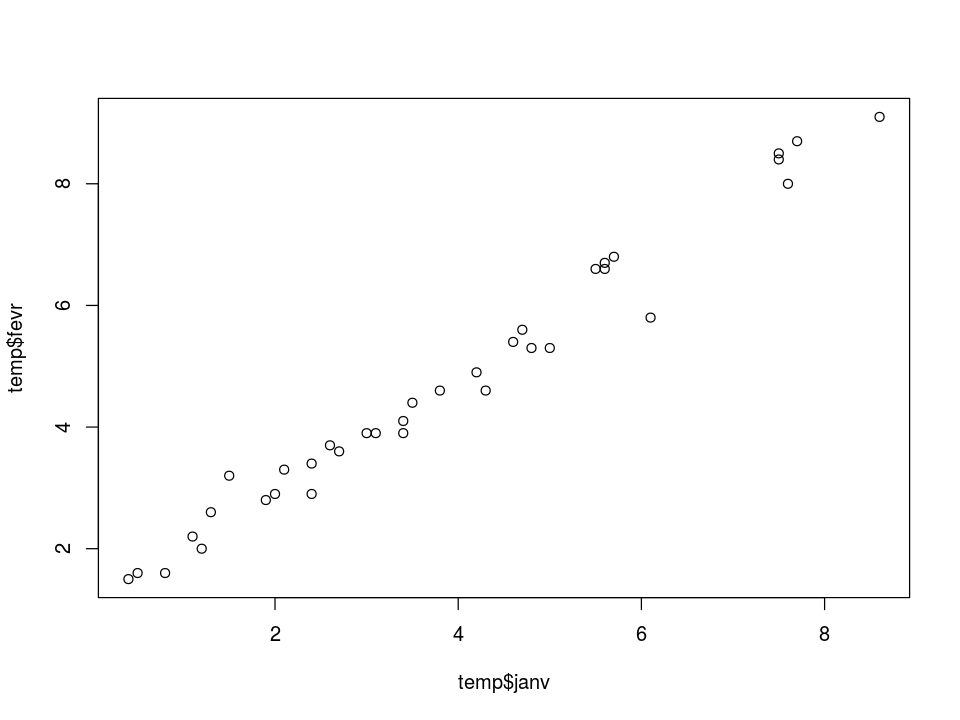

In [5]:
plot(temp$janv, temp$fevr)

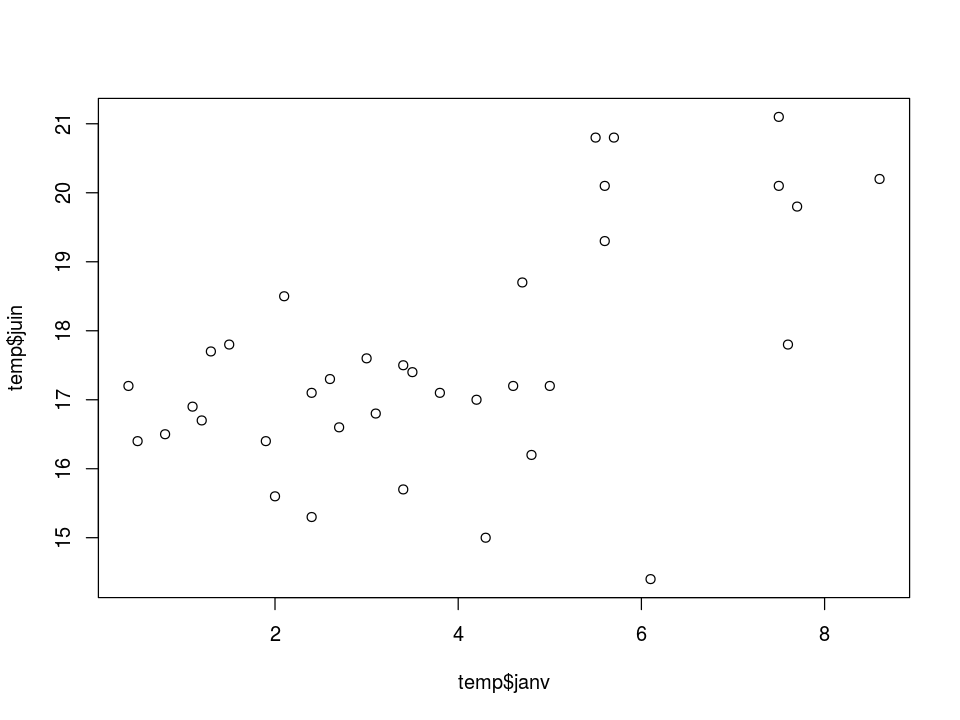

In [6]:
plot(temp$janv, temp$juin)

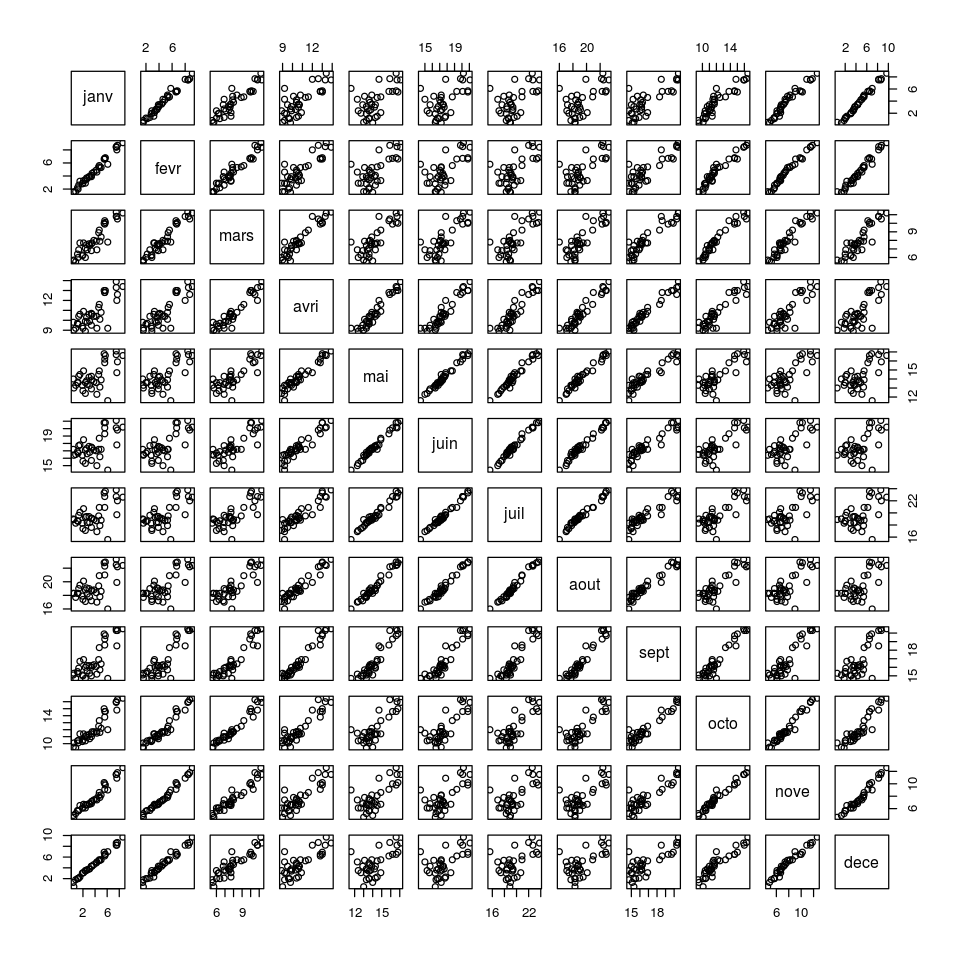

In [7]:
options(repr.plot.width=8, repr.plot.height=8)
pairs(temp)

**Q** Comment this correlation structure. Consequence for dimension reduction?

### PCA with the R package FactoMineR

FactoMineR has many nice functionalities for PCA. 
Mind however that it also gives statistical results, such as *p*-values of statistical tests or confidence ellipsoids, that should be used with care. Indeed, they are based on an implicit assumption of a Gaussian probabilistic model, which may not be verified. We do not use them here.

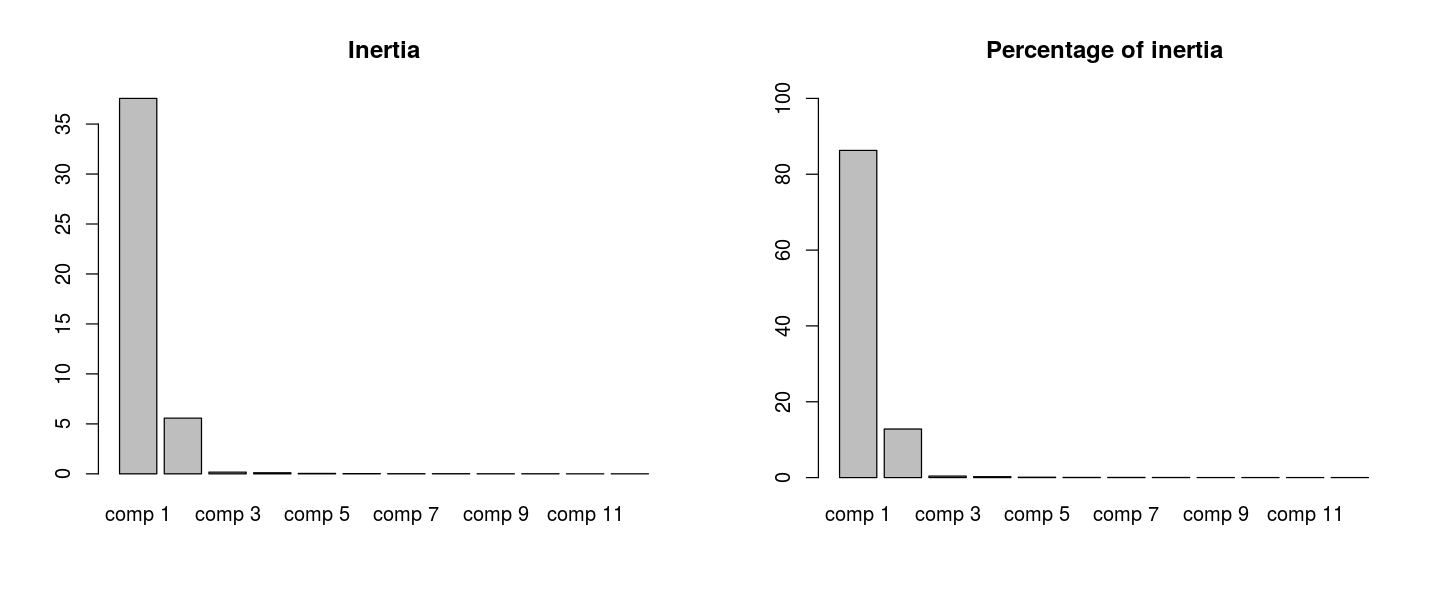

In [8]:
library(FactoMineR)
# PCA with FactoMineR
acp <- PCA(temp, scale.unit = FALSE, ncp = 12, graph = F)
options(repr.plot.width = 12, repr.plot.height = 5)
# barplot of the inertias and percentage of inertia associated to each principal component
par(mfrow = c(1, 2))
barplot(acp$eig[, 1], main = "Inertia")
barplot(acp$eig[, 2], ylim = c(0, 100), main = "Percentage of inertia")

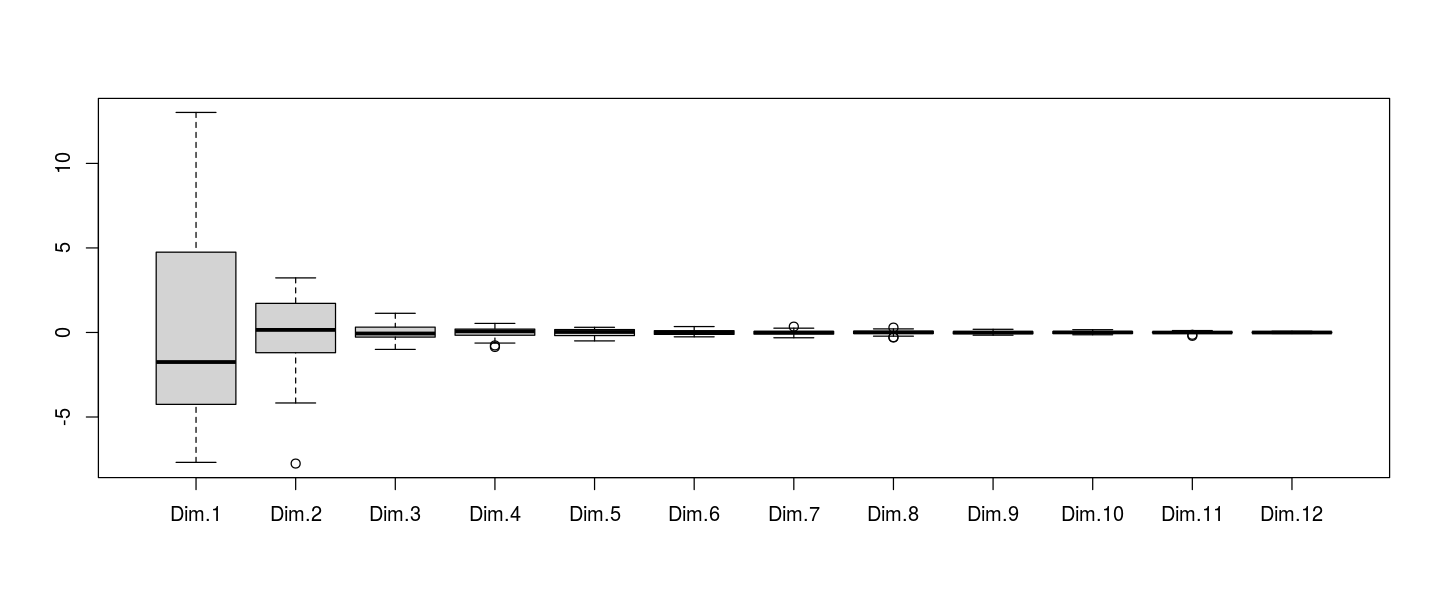

In [9]:
# Distribution of individual coordinates on the principal axes (the "principal components")
boxplot(acp$ind$coord)

**Q** Recall the interpretation of inertia in terms of variance. Then, what is the link between the two graphs above?

**Q** How many axes should we keep? Justify.  

Let us now interpret the eigenvectors defining the principal axis.

In [10]:
# Orthogonal matrix P whose columns contain the eigenvectors of the PCA
P <- acp$svd$V
P
t(P) %*% P

0.3290390,-0.38986775,0.10323897,0.11374053,-0.33464352,0.41991694,-0.03799135,0.009415908,0.62535894,-0.11694515,0.122293972,0.08116012
0.3299792,-0.25894200,0.10959282,-0.15238814,-0.27337760,0.32017142,-0.19713748,-0.049425046,-0.69936159,-0.19956697,-0.201528803,0.02704669
0.2721243,-0.04848174,0.59022791,-0.48366714,-0.04750694,-0.49563511,-0.01089671,0.130640789,0.06917833,0.04396375,0.190984072,0.18167230
0.2256422,0.13867035,0.44728993,0.05998080,0.27674747,0.22509261,0.22309526,0.043999772,0.09202144,0.21587666,-0.461667062,-0.52822313
0.1974986,0.27588497,0.20578891,0.24038615,0.50341800,0.34952061,0.08945594,0.218043649,-0.13289208,-0.20290680,0.348433172,0.41637763
0.2348523,0.36424678,0.16208373,0.33757691,-0.07842201,-0.12231944,-0.53922766,-0.567678523,0.05250208,0.16600367,-0.006849728,0.08626309
0.2689712,0.44841122,-0.15360404,0.16440263,-0.46341761,-0.05408440,-0.05973196,0.580726492,-0.06995707,0.13928870,0.187648416,-0.24074892
0.2785683,0.35613931,-0.20142509,-0.09465157,-0.19793622,-0.09896692,0.47519898,-0.162318588,0.11321803,-0.22947791,-0.464575633,0.40446254
0.2987661,0.17265811,-0.25584707,-0.35335024,0.15149284,0.03175098,0.08686552,-0.343440365,0.04041565,-0.37510673,0.405869703,-0.48382859
0.3250880,-0.06102674,-0.38928745,-0.35530687,0.22709208,0.18798525,-0.06478268,-0.003571616,0.01243962,0.69502764,0.017313072,0.19536915
0.3264980,-0.20870484,-0.27465522,0.11877488,0.38224123,-0.33881714,-0.40791482,0.318960811,0.13525372,-0.31694270,-0.333156739,-0.03902356


1.000000e+00,1.110223e-16,-5.898060e-17,1.110223e-16,1.101549e-16,-2.775558e-17,2.775558e-17,-6.938894e-18,2.359224e-16,0.000000e+00,6.938894e-17,-5.204170e-17
1.110223e-16,1.000000e+00,-1.491862e-16,2.775558e-17,-1.561251e-17,1.665335e-16,0.000000e+00,6.245005e-17,-4.163336e-17,-1.387779e-17,-4.163336e-17,-4.510281e-17
-5.898060e-17,-1.491862e-16,1.000000e+00,-2.393918e-16,-1.691355e-17,7.979728e-17,-3.469447e-18,1.370432e-16,-7.285839e-17,-5.204170e-18,-9.540979e-17,-1.647987e-17
1.110223e-16,2.775558e-17,-2.393918e-16,1.000000e+00,3.400058e-16,-1.665335e-16,-1.110223e-16,-3.191891e-16,8.326673e-17,-8.326673e-17,1.665335e-16,1.249001e-16
1.101549e-16,-1.561251e-17,-1.691355e-17,3.400058e-16,1.000000e+00,2.003606e-16,-2.775558e-17,-5.767956e-17,4.779163e-16,1.734723e-18,-1.474515e-17,4.271757e-17
-2.775558e-17,1.665335e-16,7.979728e-17,-1.665335e-16,2.003606e-16,1.000000e+00,-2.775558e-17,8.326673e-17,-1.387779e-17,8.326673e-17,-3.608225e-16,-3.053113e-16
2.775558e-17,0.000000e+00,-3.469447e-18,-1.110223e-16,-2.775558e-17,-2.775558e-17,1.000000e+00,3.469447e-16,4.163336e-17,-4.163336e-17,0.000000e+00,9.367507e-17
-6.938894e-18,6.245005e-17,1.370432e-16,-3.191891e-16,-5.767956e-17,8.326673e-17,3.469447e-16,1.000000e+00,-1.457168e-16,-2.428613e-17,-3.469447e-16,1.908196e-17
2.359224e-16,-4.163336e-17,-7.285839e-17,8.326673e-17,4.779163e-16,-1.387779e-17,4.163336e-17,-1.457168e-16,1.000000e+00,5.551115e-17,3.122502e-16,1.422473e-16
0.000000e+00,-1.387779e-17,-5.204170e-18,-8.326673e-17,1.734723e-18,8.326673e-17,-4.163336e-17,-2.428613e-17,5.551115e-17,1.000000e+00,2.289835e-16,-3.330669e-16
6.938894e-17,-4.163336e-17,-9.540979e-17,1.665335e-16,-1.474515e-17,-3.608225e-16,0.000000e+00,-3.469447e-16,3.122502e-16,2.289835e-16,1.000000e+00,-2.792905e-16


Here the data are ordered, hence we can visualize the eigenvectors as functions.

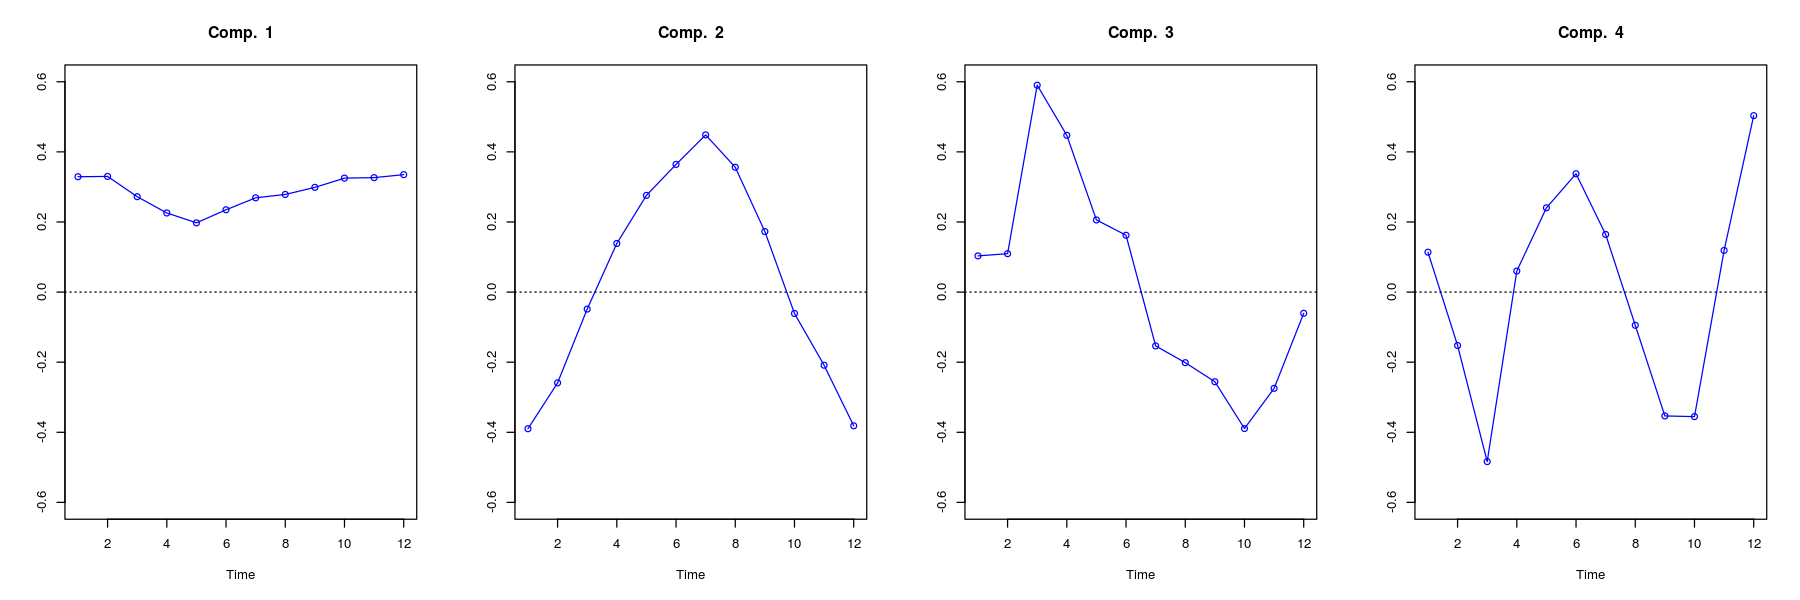

In [11]:
options(repr.plot.width = 15, repr.plot.height = 5)
par(mfrow = c(1, 4))
for (i in 1:4){
    plot(acp$svd$V[, i], type = "o", main = paste("Comp. ", i), xlab = "Time", ylab = "",
         ylim = c(-0.6, 0.6), col = "blue")
    abline(h = 0, lty = "dotted")
}

**Q** Interpret the first 2 principal axis

**Q** We plot below the "principal components", i.e. the coordinates of the individuals in the eigenvector basis (matrix C = XP). Can you confirm your interpretation?

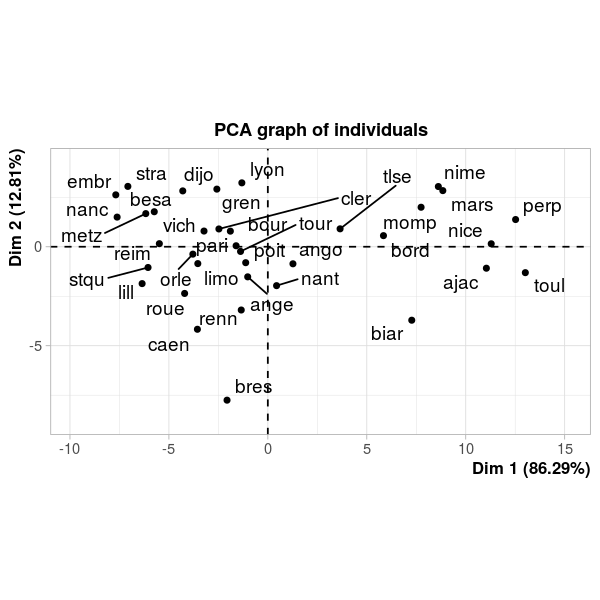

In [12]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(acp)

**Q** We print below the principal components. Check the consistency with the previous graph.

In [13]:
# printing of principal components (rows of the matrix C = XP)
acp$ind$coord

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12
ajac,11.0448576,-1.08536070,-1.00163260,-0.22755360,0.06868048,0.091940200,-0.171994141,-0.2957611854,-0.143743849,-0.036105540,-0.016784783,0.051638757
ange,-1.0171737,-1.52135498,0.29612851,0.10490866,-0.21428230,0.054427138,-0.124806977,-0.0644132217,-0.057382131,-0.023742804,0.001333575,-0.034577514
ango,1.2694332,-0.86210627,0.60066214,-0.34093425,0.08624445,0.102909603,0.345554629,0.2880026527,-0.034819957,-0.029439657,-0.019228436,0.044385375
besa,-5.7393567,1.76877859,-0.15722618,-0.18852573,0.30475204,-0.102866058,-0.109313142,-0.0472966701,0.047828346,0.064210832,-0.006856739,-0.005736826
biar,7.2744138,-3.71351618,0.38740941,-0.62697609,0.22122605,-0.138918518,-0.069414946,0.0781834112,0.100593207,-0.054997048,0.114581900,-0.006145411
bord,5.8446125,0.56067466,1.13305471,-0.38788270,0.24672620,0.157033088,0.112547383,-0.2812464481,0.029114087,0.024449276,-0.032939699,-0.015472463
bour,-1.8935417,0.78770707,0.38387235,0.14104459,-0.05806007,0.049295107,0.003944016,-0.0702093421,-0.007323005,0.022175977,0.027533570,0.035162860
bres,-2.0611236,-7.75380777,-0.14858475,0.13073935,0.11207208,-0.257388992,-0.138028058,0.0641035001,0.133172521,0.075293500,-0.136141774,0.018498488
caen,-3.5589603,-4.17121784,-0.53567622,-0.11138534,-0.09147200,0.183265110,0.184705006,0.0159147191,-0.039361152,0.022021462,0.051334197,-0.038356298
cler,-2.4724663,0.89882997,0.08234024,-0.13939058,-0.24799094,-0.194329978,0.164070810,-0.0550776906,-0.087705611,0.005703212,-0.023587532,-0.012690473


Let us check that the principal variables (column of C) are orthogonal and with squared norm = inertia

In [14]:
cov(acp$ind$coord)
n <- nrow(temp)
# note that by default the covariance uses a normalization of n-1 instead of n
cbind(norm2 = diag(cov(acp$ind$coord)) * (n-1) / n, 
      inertia = acp$eig[, 1])

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12
Dim.1,3.864073e+01,-1.049459e-14,-6.151763e-17,7.766518e-17,-1.194264e-16,9.301216e-17,-3.602436e-17,-3.291522e-17,-1.192777e-17,-1.757956e-18,-1.657513e-17,2.139363e-18
Dim.2,-1.049459e-14,5.734426e+00,2.072007e-16,1.554980e-16,-1.665063e-17,3.642338e-17,-1.960385e-18,3.125184e-17,6.643652e-17,-3.759761e-18,1.029256e-17,-4.996042e-19
Dim.3,-6.151763e-17,2.072007e-16,1.769490e-01,6.355798e-17,2.513916e-17,-1.538241e-17,5.363667e-18,6.933909e-18,1.236036e-17,-1.192380e-19,3.042688e-18,2.777784e-18
Dim.4,7.766518e-17,1.554980e-16,6.355798e-17,1.099449e-01,-2.842322e-17,-4.578570e-18,-9.697215e-18,3.404014e-18,1.278279e-19,-2.900292e-18,-3.503343e-18,-9.596543e-19
Dim.5,-1.194264e-16,-1.665063e-17,2.513916e-17,-2.842322e-17,4.404247e-02,-5.740851e-18,-5.869385e-18,-8.459439e-19,-1.858802e-18,1.498813e-18,1.463383e-18,-6.022041e-19
Dim.6,9.301216e-17,3.642338e-17,-1.538241e-17,-4.578570e-18,-5.740851e-18,2.377793e-02,3.009747e-18,3.818183e-19,5.619604e-18,1.001508e-18,1.176142e-18,6.045516e-19
Dim.7,-3.602436e-17,-1.960385e-18,5.363667e-18,-9.697215e-18,-5.869385e-18,3.009747e-18,1.795150e-02,-2.025959e-20,-3.812526e-19,2.047529e-18,1.595253e-18,-1.079952e-18
Dim.8,-3.291522e-17,3.125184e-17,6.933909e-18,3.404014e-18,-8.459439e-19,3.818183e-19,-2.025959e-20,1.453086e-02,3.950900e-18,4.257593e-18,-6.373802e-19,-1.037497e-18
Dim.9,-1.192777e-17,6.643652e-17,1.236036e-17,1.278279e-19,-1.858802e-18,5.619604e-18,-3.812526e-19,3.950900e-18,8.253533e-03,-5.959603e-19,-1.054471e-18,-4.234923e-19
Dim.10,-1.757956e-18,-3.759761e-18,-1.192380e-19,-2.900292e-18,1.498813e-18,1.001508e-18,2.047529e-18,4.257593e-18,-5.959603e-19,5.711252e-03,2.613357e-18,-2.536773e-19


,norm2,inertia
Dim.1,37.567375293,37.567375293
Dim.2,5.575136519,5.575136519
Dim.3,0.172033792,0.172033792
Dim.4,0.106890842,0.106890842
Dim.5,0.042819067,0.042819067
Dim.6,0.023117428,0.023117428
Dim.7,0.017452848,0.017452848
Dim.8,0.014127227,0.014127227
Dim.9,0.008024268,0.008024268
Dim.10,0.005552606,0.005552606


The original variables can be represented in the orthonormal basis U computed from C: columns of C, divided by their norm (square root of inertia). Their coordinates differ from the eigenvector coordinates only by a factor equal to the square root of the inertia (recall that C = XP hence X=CP'). 

In [15]:
str(acp$var$coord)

 num [1:12, 1:12] 2.02 2.02 1.67 1.38 1.21 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:12] "janv" "fevr" "mars" "avri" ...
  ..$ : chr [1:12] "Dim.1" "Dim.2" "Dim.3" "Dim.4" ...


In [16]:
cbind(varCoordSoftware = acp$var$coord[, 1],   # coordinate returned by FactoMineR
      varCoordFromEigen = acp$svd$V[, 1] * sqrt(acp$eig[1]))    # computation from the eigen decomposition

,varCoordSoftware,varCoordFromEigen
janv,2.016753,2.016753
fevr,2.022516,2.022516
mars,1.667910,1.667910
avri,1.383011,1.383011
mai,1.210513,1.210513
juin,1.439462,1.439462
juil,1.648584,1.648584
aout,1.707408,1.707408
sept,1.831204,1.831204
octo,1.992537,1.992537


If the data have been scaled first, the Euclidean norm of the coordinates = 1, and thus belong to a sphere in dimension p. If one plot a projection onto a 2D plane, the coordinates should be inside a circle. It is closer to the circle if the variable nearly belongs to that plane, i.e. is the original variable is well represented by the principal variables.

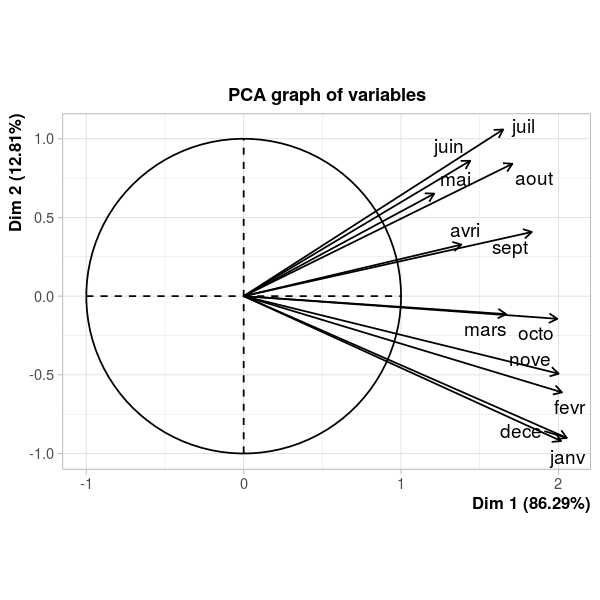

In [17]:
# Representation of the variables (unscaled PCA)
acp <- PCA(temp, scale.unit = FALSE, ncp = 12, graph = F)
plot(acp, axes = c(1, 2), choix = "var")

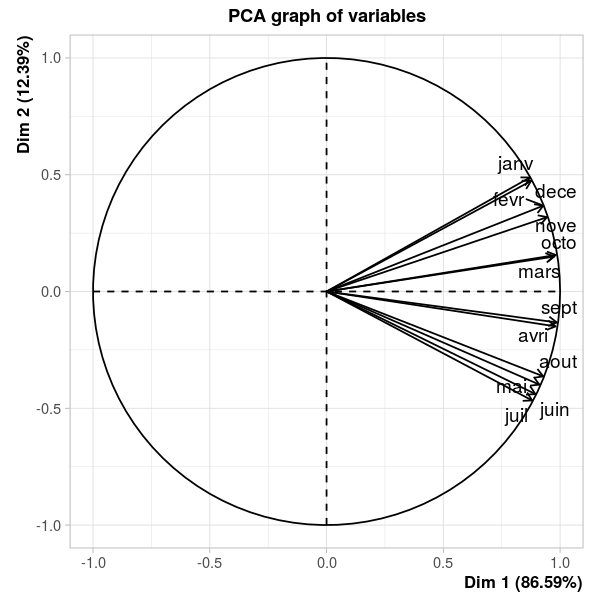

In [18]:
acp <- PCA(temp, scale.unit = TRUE, graph = F)
plot(acp, axes = c(1, 2), choix = "var")


**Q** Why the two representations are very similar?

**Q** Why can we use all the variables to interpret the principal variables 1 and 2? Can you recover the interpretation of the two first axis?

**Q** Draw a similar plot with components 3 and 4. Explain we cannot use that plot to interpret component 3. What can we do else?

Let us now consider the case of the outlier on axis 2 (Brest). Should we keep it in the analysis, or should we remove it because it completely changes the computations (matrix diagonalization, mean, etc.), in particular about the second axis? To address this question, we consider two PCAs, with or without this point.. 

**Q** Look at the code below: How this observation is excluded?

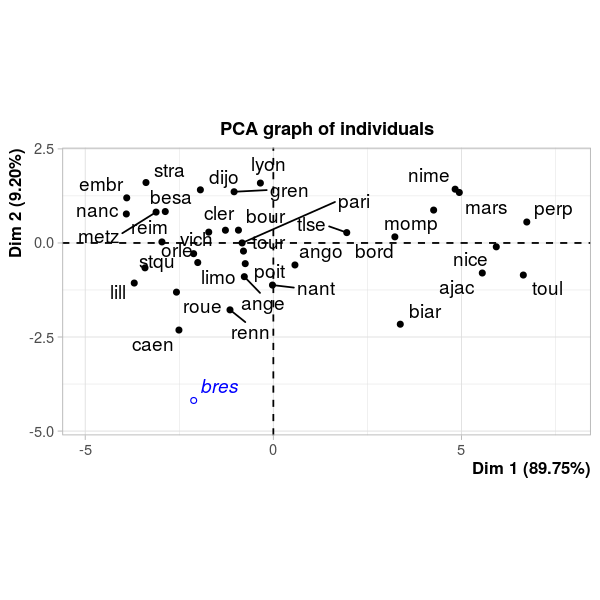

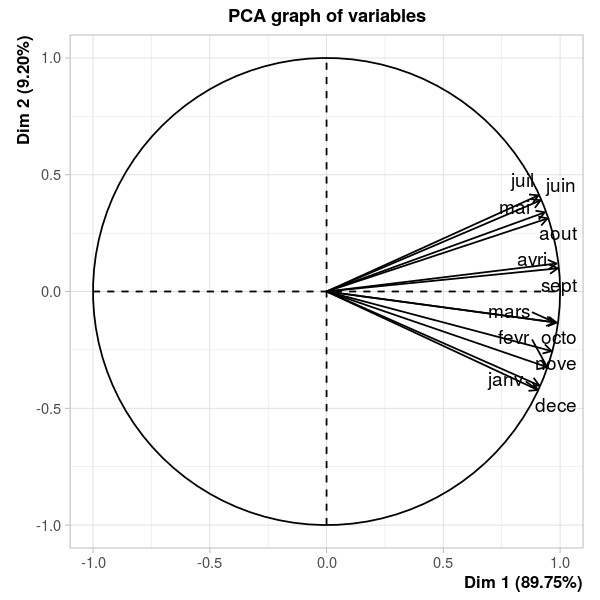

In [19]:
acp <- PCA(temp, scale.unit = TRUE, ncp = 12, graph = F, ind.sup = 8)
plot(acp)
plot(acp, choix = "var")

**Q** Is the interpretation of the axes modified? Conclusion about the outlier?